In [1]:
# coding 
import math
from math import sqrt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import scipy.stats
import scipy
import os

# needed for modeling
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.metrics import explained_variance_score
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["font.size"] = 20
from statsmodels.tsa.api import Holt

### Exercises
Using the repo setup directions, setup a new local and remote repository named anomaly-detection-exercises. The local version of your repo should live inside of ~/codeup-data-science. This repo should be named anomaly-detection-exercises

    Save this work in your anomaly-detection-exercises repo. Then add, commit, and push your changes.

continuous_probabilistic_methods.py or continuous_probabilistic_methods.ipynb 1. Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

1) Using lemonade.csv dataset and focusing on continuous variables:

- Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?
- Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?
- Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?
- Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

2) Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

- Use a 2 sigma decision rule to isolate the outliers.

    - Do these make sense?
    - Should certain outliers be kept or removed?
3) Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [2]:
# drawing csv out of webpage
lemonade = "https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv"
#renaming csv file to df
df = pd.read_csv(lemonade)

In [3]:
#looking at csv file
df

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18
...,...,...,...,...,...,...,...
360,12/27/17,Wednesday,42.7,1.00,33,0.5,19
361,12/28/17,Thursday,37.8,1.25,32,0.5,16
362,12/29/17,Friday,39.5,1.25,17,0.5,15
363,12/30/17,Saturday,30.9,1.43,22,0.5,13


sdcsdcfscvhelo 

In [6]:
def get_lower_and_upper_bounds(df, multiplier = 1.5):
    # set the quartile
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    
    # calculate the inter-quartile range
    iqr = q3 - q1
    
    # set lower and upperbound
    lower = q1 - (iqr * multiplier)
    upper = q3 + (iqr * multiplier)
    
    return lower, upper

1) 
- `Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?
Outliers to remove:`
    - Temperature lower outliers should be taken out(temp 15).
    - flyers -38 doesn't make sense.

- `Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?`
    - the flyer upper bounds makes sense because it is only a few over the 2nd quarter
    - sales anything over 200 makes no sense since it is far beyond the average.
    - keep sales under 200
    - keep rainfall as well
- `Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?`
    - flyers with negative numbers should be removed
    - temperature over 200 should be removed
    -
    
- `Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?`
    - 
    -

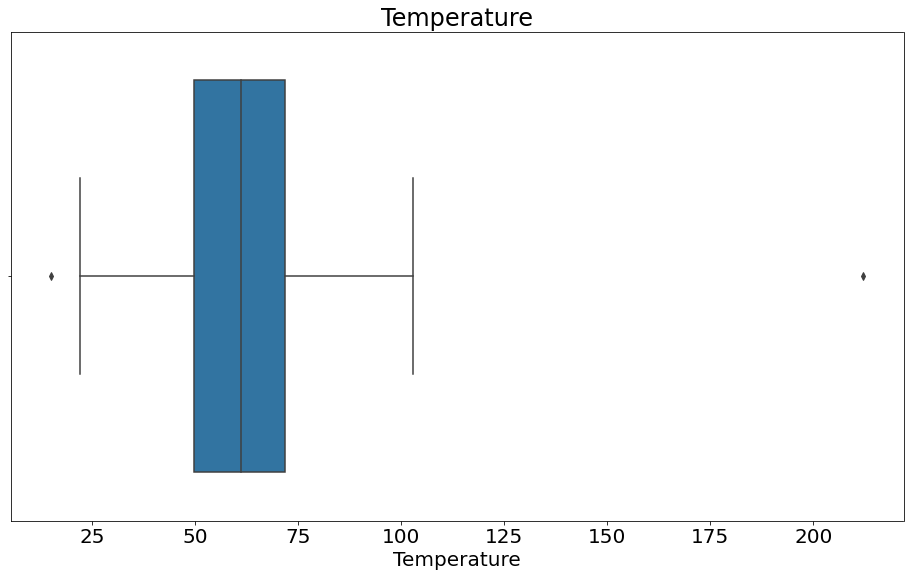

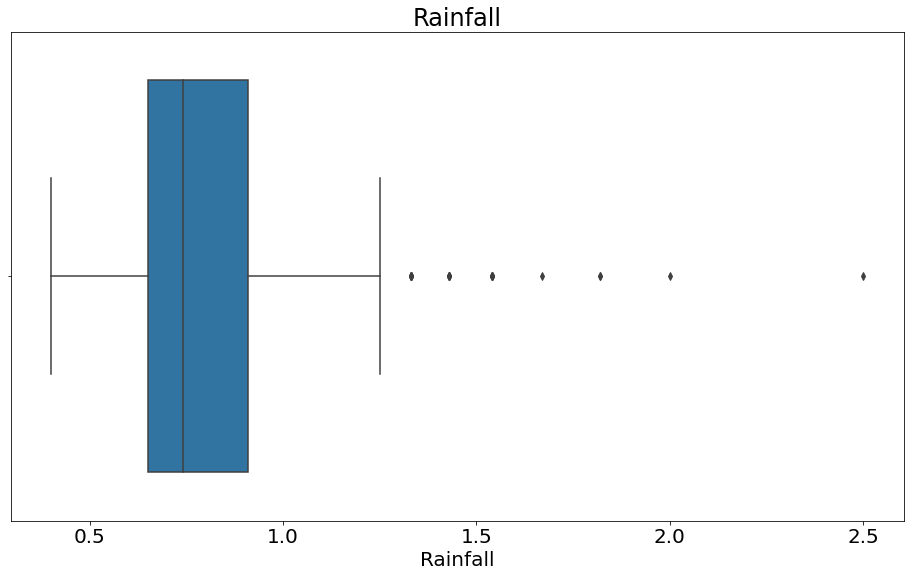

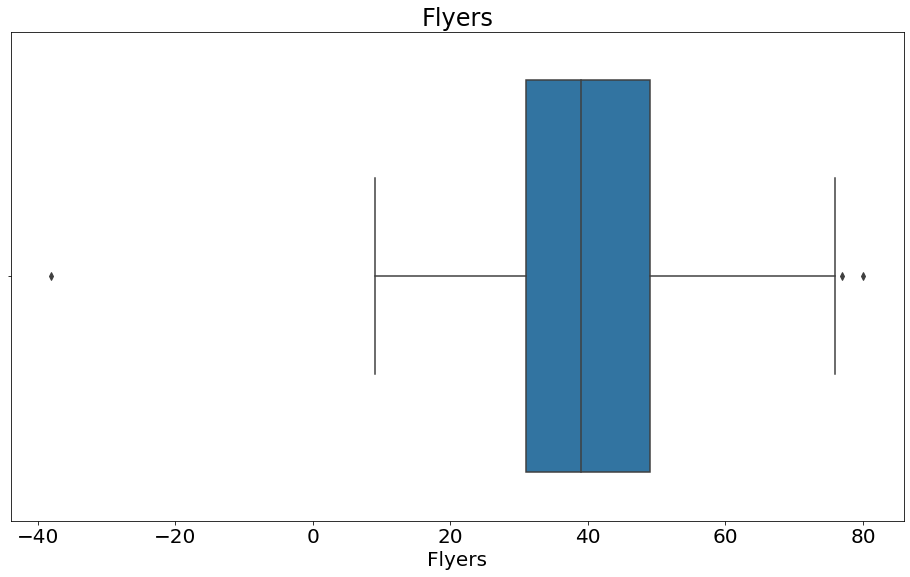

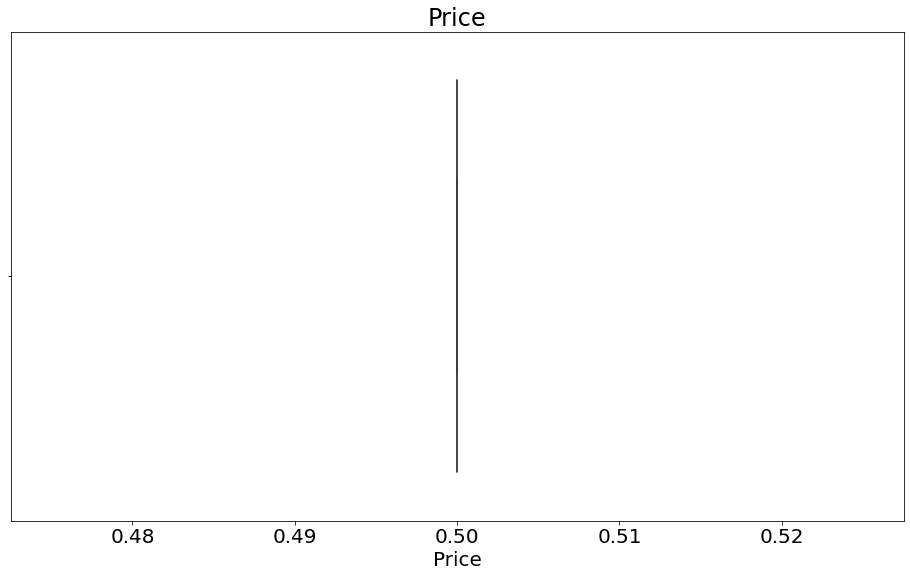

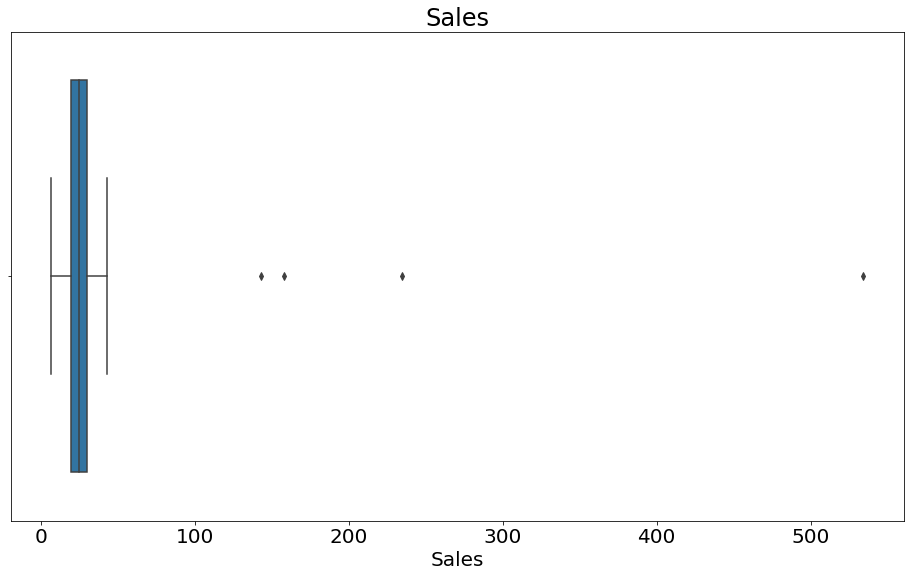

In [7]:
for cnt, col in enumerate(df.columns[2:7]):
    sns.boxplot(data=df, x=col)
    plt.title(col)
    plt.show()

In [12]:
df.Temperature.describe()

count    365.000000
mean      61.224658
std       18.085892
min       15.100000
25%       49.700000
50%       61.100000
75%       71.700000
max      212.000000
Name: Temperature, dtype: float64

In [13]:
df.Flyers.describe()

count    365.000000
mean      40.104110
std       13.786445
min      -38.000000
25%       31.000000
50%       39.000000
75%       49.000000
max       80.000000
Name: Flyers, dtype: float64

`2) Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:`

Use a 2 sigma decision rule to isolate the outliers.

Do these make sense?
Should certain outliers be kept or removed?

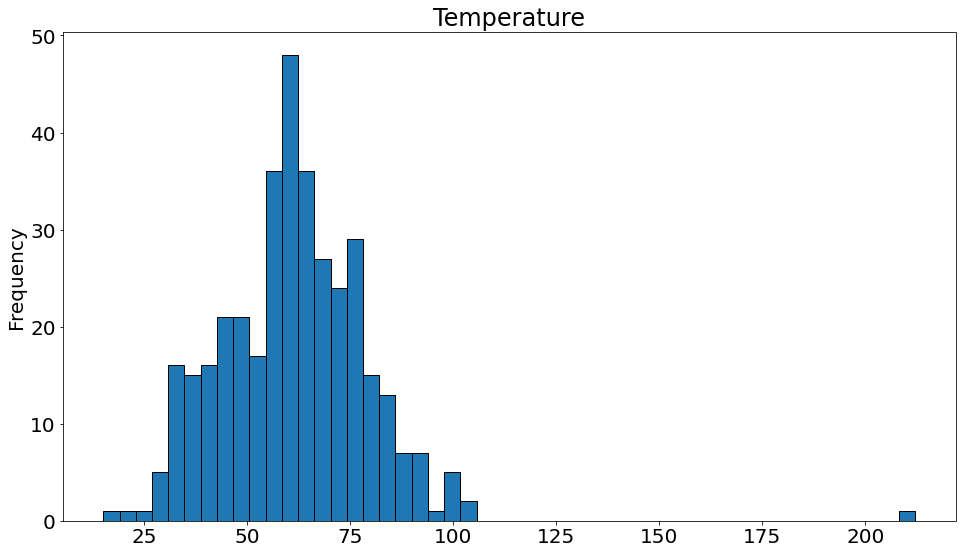

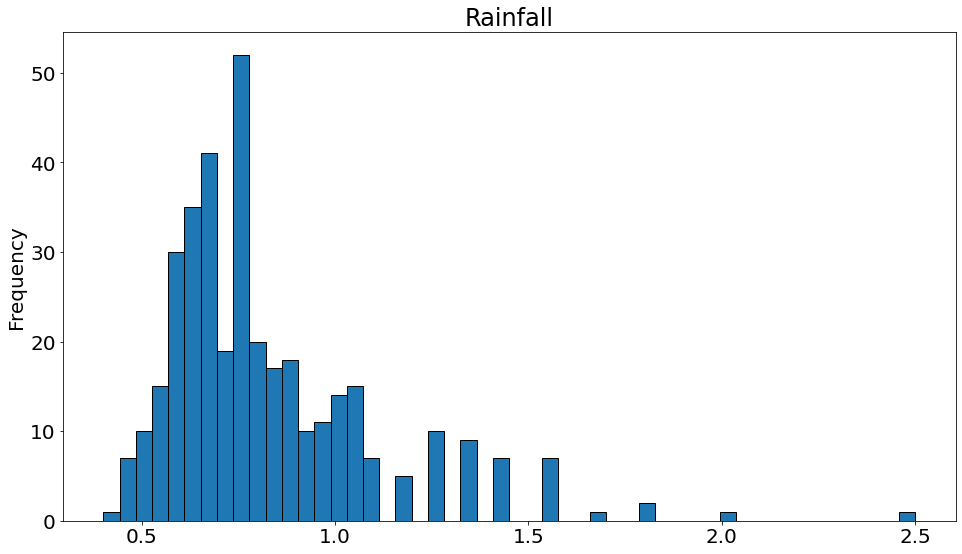

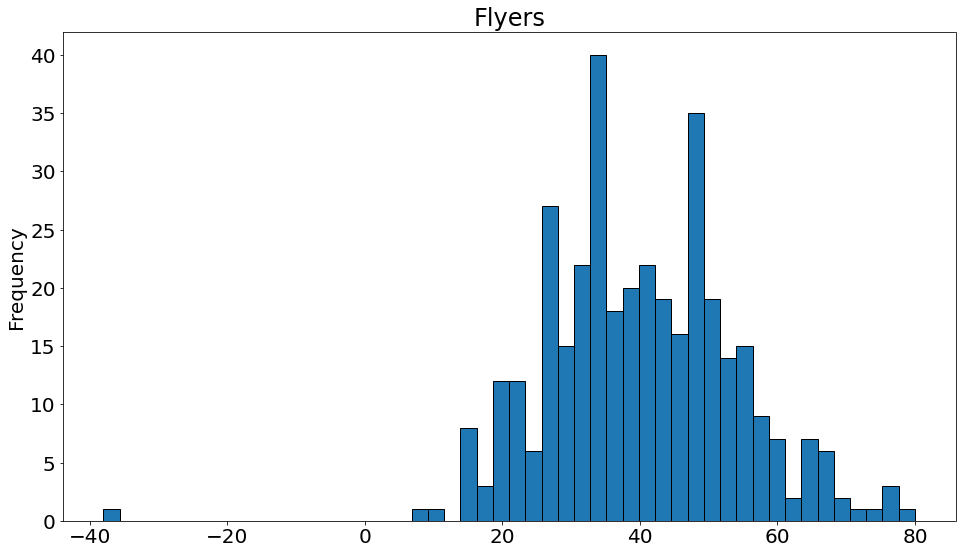

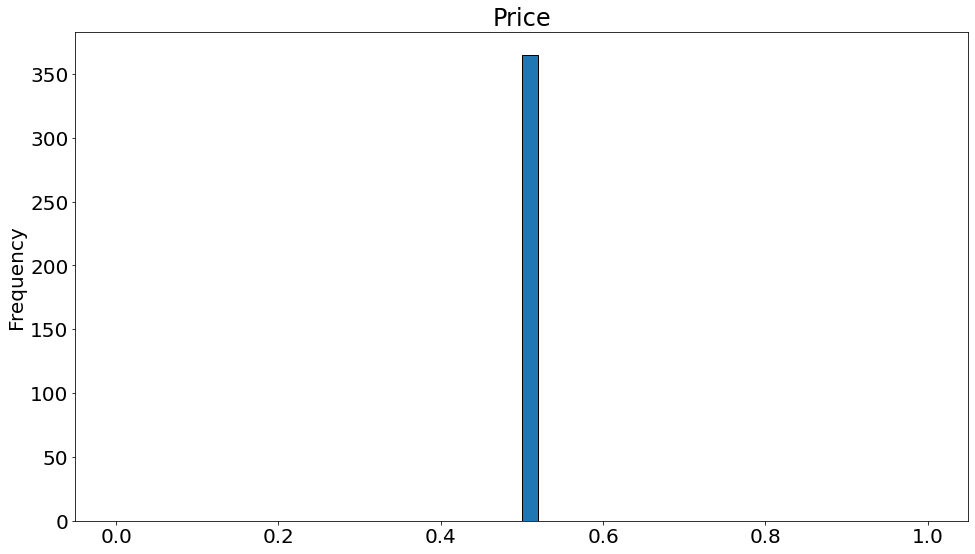

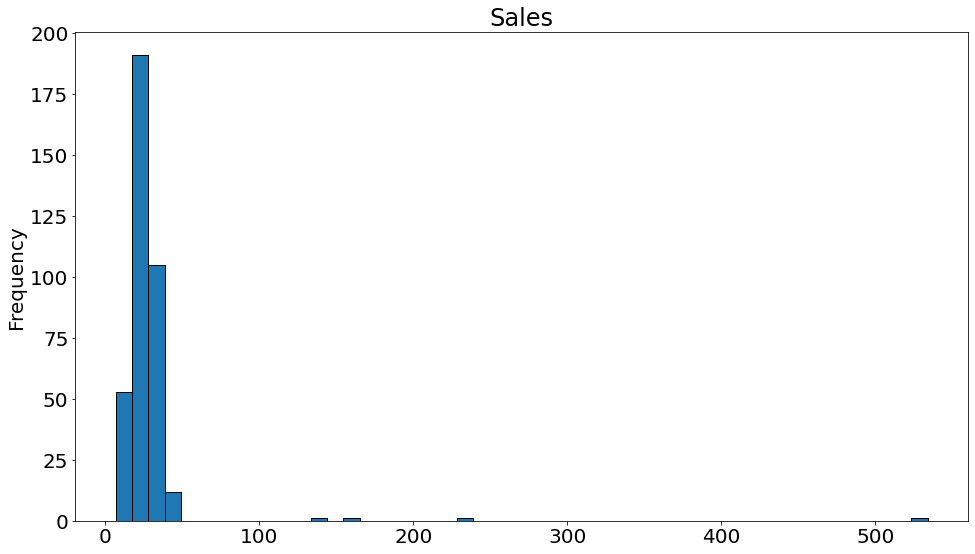

In [19]:
for col in df.columns[2:7]:
    df[col].plot.hist(ec='black', bins=50, title= col)
    plt.show()

- Take aways is that flyers have a normal distribution with the exception of the observation in -40 to -30 range.

In [24]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers_1 = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
outliers_1

/var/folders/dc/8rtfvpyj2mb6mqbnfkf5dl400000gn/T/ipykernel_9399/2178920341.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers_1 = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()


Date            0
Day             0
Flyers          3
Price           0
Rainfall       28
Sales           4
Temperature     2
dtype: int64

In [25]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers_2  = ((df < (Q1 - 3 * IQR))  | (df > (Q3 + 3 * IQR))).sum()
outliers_2

/var/folders/dc/8rtfvpyj2mb6mqbnfkf5dl400000gn/T/ipykernel_9399/1285862033.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers_2  = ((df < (Q1 - 3 * IQR))  | (df > (Q3 + 3 * IQR))).sum()


Date           0
Day            0
Flyers         1
Price          0
Rainfall       4
Sales          4
Temperature    1
dtype: int64

In [33]:
df[((df < (Q1 - 3 * IQR))  | (df > (Q3 + 3 * IQR))).abs() > 2]

/var/folders/dc/8rtfvpyj2mb6mqbnfkf5dl400000gn/T/ipykernel_9399/3900308149.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df[((df < (Q1 - 3 * IQR))  | (df > (Q3 + 3 * IQR))).abs() > 2]


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,temp_zscore,rainfall_zscore
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df['temp_zscore'] = (df.Temperature - df.Temperature.mean()) / df.Temperature.std()
df['rainfall_zscore'] = (df.Rainfall - df.Rainfall.mean()) / df.Rainfall.std()
df['flyers_zscore'] = (df.Flyers - df.Flyers.mean()) / df.Flyers.std()
df['sales_zscore'] = (df.Sales - df.Sales.mean()) / df.Sales.std()

In [37]:
df[df['temp_zscore'].abs() > 2].max()

Date                7/27/17
Day                 Tuesday
Temperature           212.0
Rainfall                2.5
Flyers                   77
Price                   0.5
Sales                   143
temp_zscore        8.336627
rainfall_zscore    6.112037
flyers_zscore      2.676244
sales_zscore       3.720233
dtype: object

In [40]:
df[df['temp_zscore'].abs() > 2].min()

Date               12/31/17
Day                  Friday
Temperature            15.1
Rainfall               0.47
Flyers                    9
Price                   0.5
Sales                     7
temp_zscore       -2.550311
rainfall_zscore   -1.299691
flyers_zscore     -2.256137
sales_zscore      -0.674217
dtype: object

- 212 degree temp still stands out and should be removed

In [38]:
df[df['flyers_zscore'].abs() >= 2].max()

Date                  7/3/17
Day                Wednesday
Temperature             99.3
Rainfall                 2.5
Flyers                    80
Price                    0.5
Sales                    235
temp_zscore         2.105251
rainfall_zscore     6.112037
flyers_zscore       2.893849
sales_zscore        6.692948
dtype: object

In [39]:
df[df['flyers_zscore'].abs() >= 2].min()

Date               11/21/17
Day                  Friday
Temperature            15.1
Rainfall               0.47
Flyers                  -38
Price                   0.5
Sales                     7
temp_zscore       -2.550311
rainfall_zscore   -1.299691
flyers_zscore     -5.665283
sales_zscore      -0.674217
dtype: object

- negative flyers score of -38 needs to be removed

***
3) `Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv`

In [41]:
df[df['temp_zscore'].abs() >= 3].min()

Date                2/11/17
Day                Saturday
Temperature           212.0
Rainfall               0.91
Flyers                   35
Price                   0.5
Sales                    21
temp_zscore        8.336627
rainfall_zscore    0.306792
flyers_zscore     -0.370227
sales_zscore      -0.221847
dtype: object

In [42]:
df[df['temp_zscore'].abs() >= 3].max()

Date                2/11/17
Day                Saturday
Temperature           212.0
Rainfall               0.91
Flyers                   35
Price                   0.5
Sales                    21
temp_zscore        8.336627
rainfall_zscore    0.306792
flyers_zscore     -0.370227
sales_zscore      -0.221847
dtype: object

- remove temp of 212

In [43]:
df[df['flyers_zscore'].abs() >= 3].min()

Date               11/21/17
Day                 Tuesday
Temperature            47.0
Rainfall               0.95
Flyers                  -38
Price                   0.5
Sales                    20
temp_zscore       -0.786506
rainfall_zscore    0.452836
flyers_zscore     -5.665283
sales_zscore      -0.254159
dtype: object

- remove -38 flyer score